Conduct an exploratory data analysis (EDA) on the given E-commerce Customer Behavior. Focus on customer behavior, purchase trends, and satisfaction levels using Python libraries: Pandas, Numpy, Matplotlib, and Seaborn.

# **EDA of E-commerce Customer Behavior**

## Dataset Overview:

- **CustomerID:** Unique identifier for each customer.
- **Gender:** Gender of the customer.
- **Age:** Age of the customer.
- **City:** City where the customer resides.
- **Membership Type:** Type of customer membership (Gold, Silver, Bronze).
- **Total Spend:** Total amount spent by the customer.
- **Items Purchased:** Number of items purchased.
- **Average Rating:** Average rating given by the customer.
- **Discount Applied:** Whether a discount was applied (True/False).
- **Days Since Last Purchase:** Number of days since the customer’s last purchase.
- **Satisfaction Level:** Customer's satisfaction level (Satisfied, Neutral, Unsatisfied).

## **Task**

### **Data Exploration**

Explore the dataset to get a general understanding of the data.

- Load the dataset using Pandas.
- Print the first 10 rows of the dataset.
- Display Statistical Summary. (show the summary for object data columns separately)
- Get the information, data types of all columns and the shape of the dataset (number of rows and columns).
- Display only Data types

(5 points)

In [ ]:
from google.colab import files
uploaded = files.upload()  # This will allow you to browse your local system to upload a file


Saving E-commerce Customer Behavior.csv to E-commerce Customer Behavior.csv


In [ ]:
import pandas as pd

# Use the exact file name that was uploaded
df = pd.read_csv('E-commerce Customer Behavior.csv')

# Display the first few rows of the dataframe
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [ ]:
# Display the first 10 rows of the dataset
first_10_rows = df.head(10)

In [ ]:
# Display statistical summary for object data columns separately
summary_all = df.describe(include='all')
summary_objects = df.describe(include=[object])


In [ ]:
# Get the information and data types
info = df.info()

# Get the shape of the dataset (number of rows and columns)
shape = df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [ ]:
# Display only data types
data_types = df.dtypes

(first_10_rows, summary_objects, shape, data_types)

(   Customer ID  Gender  Age           City Membership Type  Total Spend  \
 0          101  Female   29       New York            Gold      1120.20   
 1          102    Male   34    Los Angeles          Silver       780.50   
 2          103  Female   43        Chicago          Bronze       510.75   
 3          104    Male   30  San Francisco            Gold      1480.30   
 4          105    Male   27          Miami          Silver       720.40   
 5          106  Female   37        Houston          Bronze       440.80   
 6          107  Female   31       New York            Gold      1150.60   
 7          108    Male   35    Los Angeles          Silver       800.90   
 8          109  Female   41        Chicago          Bronze       495.25   
 9          110    Male   28  San Francisco            Gold      1520.10   
 
    Items Purchased  Average Rating  Discount Applied  \
 0               14             4.6              True   
 1               11             4.1             

### **Handling Missing Values**
Identify and deal with any missing data.

- Check for missing values in the dataset.
- If missing values exist, Show the rows with missing values.
- If missing values exist, Decide whether to fill them (using the mean, median, etc.) or drop them and justify your choice.


(3 Points)

In [ ]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

In [ ]:
# Show the rows with missing values
rows_with_missing_values = df[df.isnull().any(axis=1)]

In [ ]:
# Get summary statistics for the 'Satisfaction Level' column to help decide
satisfaction_summary = df['Satisfaction Level'].describe()

(missing_values, rows_with_missing_values, satisfaction_summary)

(Customer ID                 0
 Gender                      0
 Age                         0
 City                        0
 Membership Type             0
 Total Spend                 0
 Items Purchased             0
 Average Rating              0
 Discount Applied            0
 Days Since Last Purchase    0
 Satisfaction Level          2
 dtype: int64,
      Customer ID  Gender  Age     City Membership Type  Total Spend  \
 71           172  Female   37  Houston          Bronze        420.8   
 143          244  Female   37  Houston          Bronze        430.8   
 
      Items Purchased  Average Rating  Discount Applied  \
 71                 7             3.1             False   
 143                7             3.4             False   
 
      Days Since Last Purchase Satisfaction Level  
 71                         21                NaN  
 143                        23                NaN  ,
 count           348
 unique            3
 top       Satisfied
 freq            125
 Name:

In [ ]:
#Since Satisfaction Level is a categorical variable and the number of missing values is very small (2 out of 350), it would be more appropriate to fill the missing values rather than drop the rows
# Fill missing values in the 'Satisfaction Level' column with the most frequent value 'Satisfied'
df['Satisfaction Level'].fillna('Satisfied', inplace=True)

# Verify if missing values have been filled
missing_values_after = df.isnull().sum()

missing_values_after


<ipython-input-19-e30ea90a110b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Satisfaction Level'].fillna('Satisfied', inplace=True)


,0
Customer ID,0
Gender,0
Age,0
City,0
Membership Type,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Days Since Last Purchase,0


### **Duplicates**

- Check for duplicate records in the dataset. If duplicates exist, remove them.

(1 Point)

In [ ]:
# Check for duplicate records in the dataset
duplicate_records = df.duplicated()

# Count of duplicate records
duplicate_count = duplicate_records.sum()

# Remove duplicates if any exist
df_no_duplicates = df.drop_duplicates()

(duplicate_count, df_no_duplicates.shape)


(0, (350, 11))

### **Conditional Filtering**
Filter data based on specific conditions.

- How many customers have the Gold membership type?
- Filter and display customers who spent more than $1,000.
- Identify customers from New York who applied a discount.

( 3 points)

In [ ]:
gold_members_count = df[df['Membership Type'] == 'Gold'].shape[0]
print(gold_members_count)


117


In [ ]:
# Customers who spent more than $1,000
customers_spent_above_1000 = df[df['Total Spend'] > 1000]
print("\nCustomers who spent more than $1,000:")
print(customers_spent_above_1000)


Customers who spent more than $1,000:
     Customer ID  Gender  Age           City Membership Type  Total Spend  \
0            101  Female   29       New York            Gold       1120.2   
3            104    Male   30  San Francisco            Gold       1480.3   
6            107  Female   31       New York            Gold       1150.6   
9            110    Male   28  San Francisco            Gold       1520.1   
12           113  Female   30       New York            Gold       1200.8   
..           ...     ...  ...            ...             ...          ...   
335          436  Female   30       New York            Gold       1200.8   
338          439    Male   30  San Francisco            Gold       1460.5   
341          442  Female   31       New York            Gold       1140.6   
344          445    Male   28  San Francisco            Gold       1480.1   
347          448  Female   30       New York            Gold       1190.8   

     Items Purchased  Average Rating

In [ ]:
# Customers from New York who applied a discount
ny_discount_customers = df[(df['City'] == 'New York') & (df['Discount Applied'] == True)]

(gold_members_count, customers_spent_above_1000, ny_discount_customers)

print("\nCustomers from New York who applied a discount:")
print(ny_discount_customers)


Customers from New York who applied a discount:
     Customer ID  Gender  Age      City Membership Type  Total Spend  \
0            101  Female   29  New York            Gold       1120.2   
6            107  Female   31  New York            Gold       1150.6   
12           113  Female   30  New York            Gold       1200.8   
18           119  Female   32  New York            Gold       1170.3   
24           125  Female   31  New York            Gold       1140.6   
30           131  Female   30  New York            Gold       1190.8   
36           137  Female   32  New York            Gold       1160.3   
42           143  Female   31  New York            Gold       1130.6   
48           149  Female   30  New York            Gold       1180.8   
54           155  Female   31  New York            Gold       1140.6   
60           161  Female   30  New York            Gold       1190.8   
66           167  Female   32  New York            Gold       1160.3   
72           17

### **Analysis**


 ( Hint: Group by, conditional filtering, Visualization )

##### Which membership type shows the highest total spending in the dataset?  (2 Points)

In [ ]:
# Group by Membership Type and calculate the total spending for each type
total_spending_by_membership = df.groupby('Membership Type')['Total Spend'].sum()

# Print the total spending by membership type
print("Total spending by membership type:")
print(total_spending_by_membership)

Total spending by membership type:
Membership Type
Bronze     54913.1
Gold      153403.9
Silver     87566.6
Name: Total Spend, dtype: float64


In [ ]:
# Identify the membership type with the highest total spending
highest_spending_membership = total_spending_by_membership.idxmax()
highest_spending_value = total_spending_by_membership.max()

(total_spending_by_membership, highest_spending_membership, highest_spending_value)

# Print the membership type with the highest total spending
print(f"\nMembership type with the highest total spending: {highest_spending_membership}")
print(f"Total spending for {highest_spending_membership} membership: ${highest_spending_value}")


Membership type with the highest total spending: Gold
Total spending for Gold membership: $153403.9


#### How does customer satisfaction impact total spending across different membership types? Which membership type spends more based on satisfaction levels? (2 Points)

In [ ]:
# Group by Membership Type and Satisfaction Level, then calculate the total spending
spending_by_membership_and_satisfaction = df.groupby(['Membership Type', 'Satisfaction Level'])['Total Spend'].sum()
# Print total spending by membership type and satisfaction level
print("Total spending by membership type and satisfaction level:")
print(spending_by_membership_and_satisfaction)


Total spending by membership type and satisfaction level:
Membership Type  Satisfaction Level
Bronze           Neutral                25068.3
                 Satisfied                851.6
                 Unsatisfied            28993.2
Gold             Satisfied             153403.9
Silver           Neutral                40888.0
                 Satisfied               6636.0
                 Unsatisfied            40042.6
Name: Total Spend, dtype: float64


In [ ]:
# Find which membership type spends more based on satisfaction levels
highest_spending_by_satisfaction = spending_by_membership_and_satisfaction.groupby(level=0).idxmax()
highest_spending_values = spending_by_membership_and_satisfaction.groupby(level=0).max()

(spending_by_membership_and_satisfaction, highest_spending_by_satisfaction, highest_spending_values)

(Membership Type  Satisfaction Level
 Bronze           Neutral                25068.3
                  Satisfied                851.6
                  Unsatisfied            28993.2
 Gold             Satisfied             153403.9
 Silver           Neutral                40888.0
                  Satisfied               6636.0
                  Unsatisfied            40042.6
 Name: Total Spend, dtype: float64,
 Membership Type
 Bronze    (Bronze, Unsatisfied)
 Gold          (Gold, Satisfied)
 Silver        (Silver, Neutral)
 Name: Total Spend, dtype: object,
 Membership Type
 Bronze     28993.2
 Gold      153403.9
 Silver     40888.0
 Name: Total Spend, dtype: float64)

#### What is the average rating for customers who applied discounts, and does the membership type have any effect on the ratings? (2 points)

In [ ]:
# Calculate the average rating for customers who applied discounts
avg_rating_with_discount = df[df['Discount Applied'] == True]['Average Rating'].mean()

In [ ]:
# Group by Membership Type and Discount Applied, then calculate the average rating
avg_rating_by_membership_and_discount = df.groupby(['Membership Type', 'Discount Applied'])['Average Rating'].mean()

(avg_rating_with_discount, avg_rating_by_membership_and_discount)

(3.979428571428572,
 Membership Type  Discount Applied
 Bronze           False               3.193103
                  True                3.456897
 Gold             False               4.808621
                  True                4.544068
 Silver           False               4.172881
                  True                3.927586
 Name: Average Rating, dtype: float64)

#### Analyze the Impact of Days Since Last Purchase on Satisfaction Level (2 Points)

Impact of Days Since Last Purchase on Satisfaction Level:
Satisfaction Level
Neutral        19.289720
Satisfied      17.763780
Unsatisfied    42.982759
Name: Days Since Last Purchase, dtype: float64


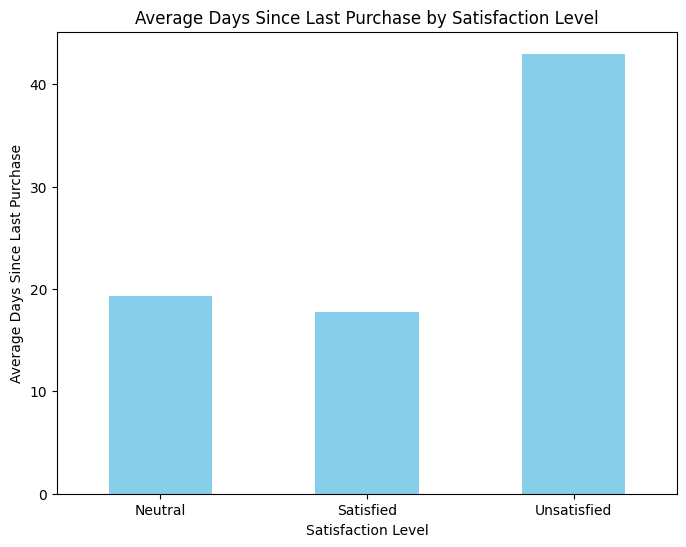

In [ ]:
# Group by Satisfaction Level and calculate the average Days Since Last Purchase
days_since_last_purchase_satisfaction = df.groupby('Satisfaction Level')['Days Since Last Purchase'].mean()

# Print the analysis
print("Impact of Days Since Last Purchase on Satisfaction Level:")
print(days_since_last_purchase_satisfaction)

# Visualize the impact with a bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
days_since_last_purchase_satisfaction.plot(kind='bar', color='skyblue')
plt.title("Average Days Since Last Purchase by Satisfaction Level")
plt.xlabel("Satisfaction Level")
plt.ylabel("Average Days Since Last Purchase")
plt.xticks(rotation=0)
plt.show()
